In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [3]:
df = pd.read_csv("../input/cancer.csv")

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.drop(columns = ["id","Unnamed: 32"],inplace = True)

In [6]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
dfben = df.loc[df.diagnosis == "B",:]
dfmal = df.loc[df.diagnosis == "M",:]

In [8]:
dfbensample = dfben.sample(n=212,random_state=42)

In [9]:
df = pd.concat([dfbensample,dfmal])

In [10]:
x = df.iloc[:,1:]
y = df["diagnosis"]

In [11]:
y.value_counts()

diagnosis
B    212
M    212
Name: count, dtype: int64

In [12]:
x_se = x.iloc[:,10:20]

In [13]:
x_se

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
395,0.1504,1.6850,1.237,12.67,0.005371,0.01273,0.011320,0.009155,0.01719,0.001444
110,0.4030,1.4240,2.747,22.87,0.013850,0.02932,0.027220,0.010230,0.03281,0.004638
481,0.3316,0.9264,2.056,28.41,0.003704,0.01082,0.015300,0.006275,0.01062,0.002217
493,0.3276,1.4860,2.108,24.60,0.010390,0.01003,0.006416,0.007895,0.02869,0.004821
136,0.4489,2.5080,3.258,34.37,0.006578,0.01380,0.026620,0.013070,0.01359,0.003707
...,...,...,...,...,...,...,...,...,...,...
563,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.078450,0.026240,0.02057,0.006213
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.051980,0.024540,0.01114,0.004239
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.039500,0.016780,0.01898,0.002498
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.047300,0.015570,0.01318,0.003892


<Axes: >

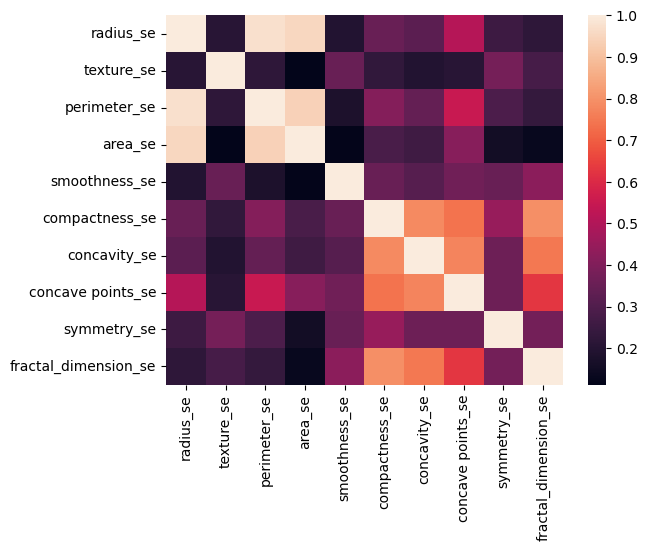

In [14]:
sns.heatmap(data=x_se.corr())

In [15]:
x.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.310160,0.997721,0.988081,0.189601,0.504577,0.672740,0.824131,0.141487,-0.306457,...,0.966183,0.276109,0.961799,0.939116,0.127465,0.374167,0.497335,0.726803,0.139735,-0.031473
texture_mean,0.310160,1.000000,0.314764,0.301619,-0.029535,0.213825,0.265356,0.262807,0.065073,-0.084629,...,0.334459,0.902844,0.340338,0.321342,0.072451,0.250187,0.267407,0.259175,0.094849,0.092624
perimeter_mean,0.997721,0.314764,1.000000,0.986686,0.229615,0.556884,0.713213,0.853377,0.181057,-0.254437,...,0.965746,0.281498,0.967160,0.938751,0.160293,0.418037,0.535975,0.755148,0.167350,0.013158
area_mean,0.988081,0.301619,0.986686,1.000000,0.190829,0.490655,0.676824,0.819397,0.139194,-0.285005,...,0.957959,0.259772,0.954254,0.954689,0.122273,0.346974,0.479498,0.700776,0.111837,-0.038604
smoothness_mean,0.189601,-0.029535,0.229615,0.190829,1.000000,0.695635,0.586398,0.591939,0.545782,0.622370,...,0.234967,0.052082,0.265612,0.220452,0.816281,0.523978,0.509120,0.561167,0.412652,0.543451
compactness_mean,0.504577,0.213825,0.556884,0.490655,0.695635,1.000000,0.886641,0.833724,0.640477,0.573860,...,0.532788,0.237511,0.591140,0.500258,0.592604,0.866781,0.825185,0.825852,0.540898,0.672895
concavity_mean,0.672740,0.265356,0.713213,0.676824,0.586398,0.886641,1.000000,0.923391,0.542191,0.356376,...,0.678231,0.267431,0.721656,0.660933,0.483573,0.733283,0.876239,0.856732,0.424742,0.489474
concave points_mean,0.824131,0.262807,0.853377,0.819397,0.591939,0.833724,0.923391,1.000000,0.480603,0.178054,...,0.827366,0.265378,0.854729,0.801019,0.469259,0.643401,0.742335,0.905229,0.378125,0.338337
symmetry_mean,0.141487,0.065073,0.181057,0.139194,0.545782,0.640477,0.542191,0.480603,1.000000,0.520554,...,0.179347,0.093152,0.220001,0.163807,0.421848,0.515747,0.481638,0.465382,0.711040,0.471245
fractal_dimension_mean,-0.306457,-0.084629,-0.254437,-0.285005,0.622370,0.573860,0.356376,0.178054,0.520554,1.000000,...,-0.247092,-0.042419,-0.194667,-0.233607,0.531196,0.501630,0.393525,0.209680,0.379593,0.787394


In [16]:
x_se.drop(columns=["perimeter_se","area_se","concave points_se"],inplace = True)

C:\Users\sebastian\AppData\Local\Temp\ipykernel_7456\3386248250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_se.drop(columns=["perimeter_se","area_se","concave points_se"],inplace = True)


In [17]:
X_trainserl, X_testserl, y_trainserl, y_testserl = train_test_split(
    x_se, y, test_size=0.3, random_state=42,stratify = y)

In [18]:
y_trainserl.value_counts()

diagnosis
B    148
M    148
Name: count, dtype: int64

In [19]:
clfserl = LogisticRegression()

In [20]:
clfserl.fit(X_trainserl,y_trainserl)

LogisticRegression()

In [21]:
clfserl.coef_

array([[ 5.22047302, -0.7028494 , -0.03693321,  0.32358255,  0.35138739,
        -0.09581561, -0.01472618]])

In [22]:
clfserl.intercept_

array([-1.33203118])

In [23]:
y_predserl = clfserl.predict(X_testserl)

In [24]:
y_predserl

array(['B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B'],
      dtype=object)

In [25]:
matrizserl = confusion_matrix(y_testserl, y_predserl)

<Axes: >

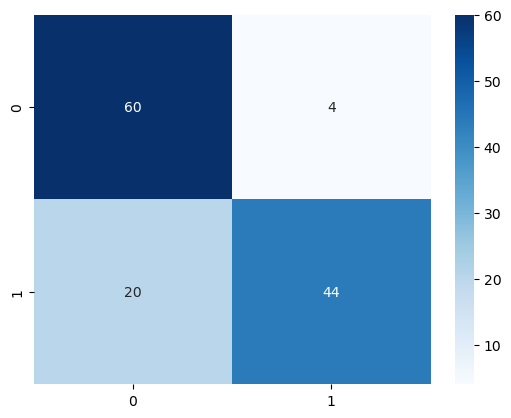

In [26]:
sns.heatmap(data = matrizserl, annot = True, cmap = 'Blues')

In [27]:
accuracyserl = accuracy_score(y_testserl, y_predserl) 

In [28]:
accuracyserl

0.8125

In [29]:
recallserl = recall_score(y_testserl, y_predserl, average='weighted')

In [30]:
recallserl

0.8125

In [31]:
precisionserl = precision_score(y_testserl, y_predserl, average='weighted')

In [32]:
precisionserl

0.8333333333333333

In [33]:
clfsedt = DecisionTreeClassifier()

In [34]:
param_gridse = {
    'criterion': ['gini', 'entropy']
}

In [35]:
grid_searchsedt = GridSearchCV(estimator=clfsedt, param_grid=param_gridse, cv=5, scoring='accuracy')
grid_searchsedt.fit(X_trainserl, y_trainserl)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [36]:
grid_searchsedt.best_params_

{'criterion': 'gini'}

In [37]:
y_predsedt = grid_searchsedt.best_estimator_.predict(X_testserl)

In [38]:
accuracysedt = accuracy_score(y_testserl, y_predsedt)

In [39]:
accuracysedt

0.7578125

In [40]:
recallsedt = recall_score(y_testserl, y_predsedt, average='weighted')

In [41]:
recallsedt

0.7578125

In [42]:
precisionsedt = precision_score(y_testserl, y_predsedt, average='weighted')

In [43]:
precisionsedt

0.7593957258658806

In [44]:
x_w = x.iloc[:,20:30]

In [45]:
x_w

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
395,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...
563,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
564,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


<Axes: >

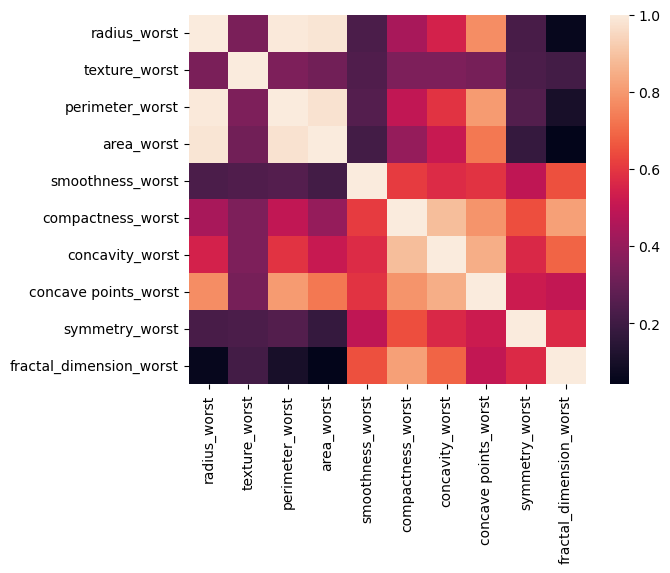

In [46]:
sns.heatmap(data=x_w.corr())

In [47]:
x_w.drop(columns=["perimeter_worst","area_worst","concave points_worst"],inplace = True)

C:\Users\sebastian\AppData\Local\Temp\ipykernel_7456\557816031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_w.drop(columns=["perimeter_worst","area_worst","concave points_worst"],inplace = True)


In [48]:
X_trainwrl, X_testwrl, y_trainwrl, y_testwrl = train_test_split(
    x_w, y, test_size=0.3, random_state=42,stratify = y)

In [49]:
y_trainwrl.value_counts()

diagnosis
B    148
M    148
Name: count, dtype: int64

In [50]:
clfwrl = LogisticRegression()

In [51]:
clfwrl.fit(X_trainwrl,y_trainwrl)

LogisticRegression()

In [52]:
clfwrl.coef_

array([[0.98569471, 0.21151078, 0.34661783, 1.79774994, 2.34207085,
        0.78431905, 0.27424748]])

In [53]:
clfwrl.intercept_

array([-23.15662884])

In [54]:
y_predwrl = clfwrl.predict(X_testwrl)

In [55]:
y_predwrl

array(['M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M'],
      dtype=object)

In [56]:
matrizwrl = confusion_matrix(y_testwrl, y_predwrl)

<Axes: >

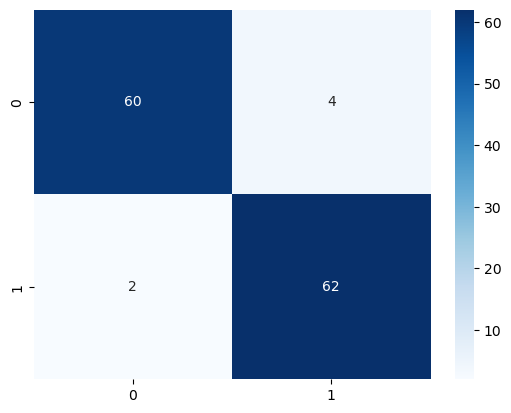

In [57]:
sns.heatmap(data = matrizwrl, annot = True, cmap = 'Blues')

In [58]:
accuracywrl = accuracy_score(y_testwrl, y_predwrl) 

In [59]:
accuracywrl

0.953125

In [60]:
recallwrl = recall_score(y_testwrl, y_predwrl, average='weighted')

In [61]:
recallwrl

0.953125

In [62]:
precisionwrl = precision_score(y_testwrl, y_predwrl, average='weighted')

In [63]:
precisionwrl

0.9535679374389052

In [64]:
clfwdt = DecisionTreeClassifier()

In [65]:
param_gridw = {
    'criterion': ['gini', 'entropy']
}

In [66]:
grid_searchwdt = GridSearchCV(estimator=clfwdt, param_grid=param_gridw, cv=5, scoring='accuracy')
grid_searchwdt.fit(X_trainwrl, y_trainwrl)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [67]:
grid_searchwdt.best_params_

{'criterion': 'entropy'}

In [68]:
y_predwdt = grid_searchwdt.best_estimator_.predict(X_testwrl)

In [69]:
accuracywdt = accuracy_score(y_testwrl, y_predwdt)

In [70]:
accuracywdt

0.9140625

In [71]:
recallwdt = recall_score(y_testwrl, y_predwdt, average='weighted')

In [72]:
recallwdt

0.9140625

In [73]:
precisionwdt = precision_score(y_testwrl, y_predwdt, average='weighted')

In [74]:
precisionwdt

0.9149743087839491

In [75]:
x_meanse = x.iloc[:,:20]

In [76]:
x_meanse

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,0.1504,1.6850,1.237,12.67,0.005371,0.01273,0.011320,0.009155,0.01719,0.001444
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,0.4030,1.4240,2.747,22.87,0.013850,0.02932,0.027220,0.010230,0.03281,0.004638
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,0.3316,0.9264,2.056,28.41,0.003704,0.01082,0.015300,0.006275,0.01062,0.002217
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,0.3276,1.4860,2.108,24.60,0.010390,0.01003,0.006416,0.007895,0.02869,0.004821
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,0.4489,2.5080,3.258,34.37,0.006578,0.01380,0.026620,0.013070,0.01359,0.003707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.078450,0.026240,0.02057,0.006213
564,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.051980,0.024540,0.01114,0.004239
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.039500,0.016780,0.01898,0.002498
566,16.600,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.047300,0.015570,0.01318,0.003892


<Axes: >

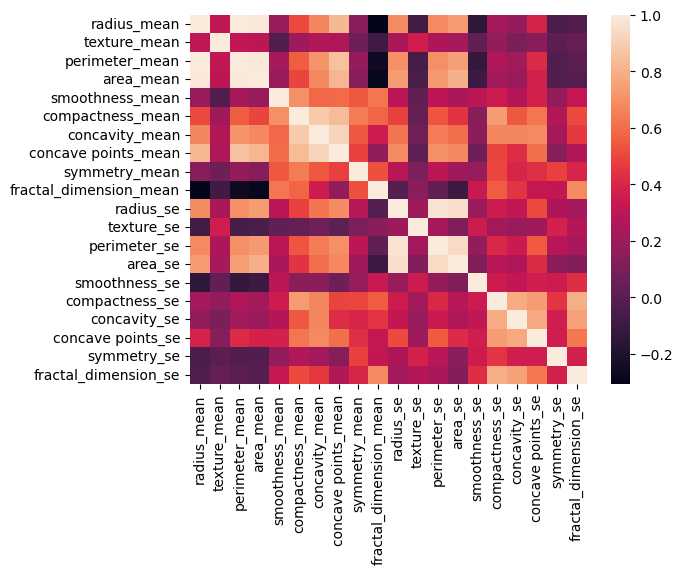

In [77]:
sns.heatmap(data=x_meanse.corr())

In [78]:
x_meanse.drop(columns=["perimeter_mean","area_mean","concave points_mean","perimeter_se","area_se","concave points_se"],inplace = True)

C:\Users\sebastian\AppData\Local\Temp\ipykernel_7456\1145486515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_meanse.drop(columns=["perimeter_mean","area_mean","concave points_mean","perimeter_se","area_se","concave points_se"],inplace = True)


In [79]:
X_trainmserl, X_testmserl, y_trainmserl, y_testmserl = train_test_split(
    x_meanse, y, test_size=0.3, random_state=42,stratify = y)

In [80]:
y_trainmserl.value_counts()

diagnosis
B    148
M    148
Name: count, dtype: int64

In [81]:
clfmserl = LogisticRegression()

In [82]:
clfmserl.fit(X_trainmserl,y_trainmserl)

LogisticRegression()

In [83]:
clfmserl.coef_

array([[ 0.76807373,  0.25109129,  0.47429458,  1.48796513,  1.99966843,
         0.67633836,  0.20431571,  1.80731484, -0.78857061,  0.01668808,
         0.19905757,  0.28822403,  0.03400316,  0.0195547 ]])

In [84]:
clfmserl.intercept_

array([-16.16750143])

In [85]:
y_predmserl = clfmserl.predict(X_testmserl)

In [86]:
y_predmserl

array(['B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M'],
      dtype=object)

In [87]:
matrizmserl = confusion_matrix(y_testmserl, y_predmserl)

<Axes: >

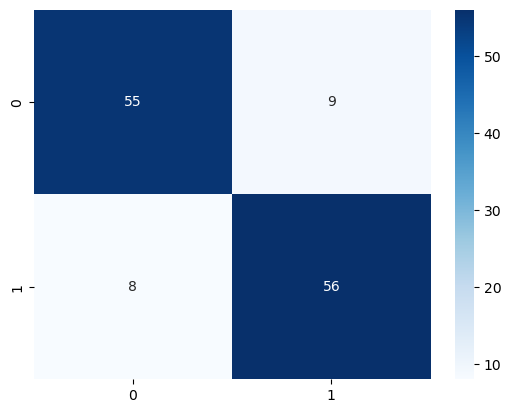

In [88]:
sns.heatmap(data = matrizmserl, annot = True, cmap = 'Blues')

In [89]:
accuracymserl = accuracy_score(y_testmserl, y_predmserl) 

In [90]:
accuracymserl

0.8671875

In [91]:
recallmserl = recall_score(y_testmserl, y_predmserl, average='weighted')

In [92]:
recallmserl

0.8671875

In [93]:
precisionmserl = precision_score(y_testmserl, y_predmserl, average='weighted')

In [94]:
precisionmserl

0.8672771672771673

In [95]:
clfmsedt = DecisionTreeClassifier()

In [96]:
param_gridmse = {
    'criterion': ['gini', 'entropy']
}

In [97]:
grid_searchmsedt = GridSearchCV(estimator=clfmsedt, param_grid=param_gridmse, cv=5, scoring='accuracy')
grid_searchmsedt.fit(X_trainmserl, y_trainmserl)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [98]:
grid_searchmsedt.best_params_

{'criterion': 'entropy'}

In [99]:
y_predmsedt = grid_searchmsedt.best_estimator_.predict(X_testmserl)

In [100]:
accuracymsedt = accuracy_score(y_testmserl, y_predmsedt)

In [101]:
accuracymsedt

0.9296875

In [102]:
recallmsedt = recall_score(y_testmserl, y_predmsedt, average='weighted')

In [103]:
recallmsedt

0.9296875

In [104]:
precisionmsedt = precision_score(y_testmserl, y_predmsedt, average='weighted')

In [105]:
precisionmsedt

0.9297924297924298

In [106]:
x_wse = x.iloc[:,10:30]

In [107]:
x_wse

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
395,0.1504,1.6850,1.237,12.67,0.005371,0.01273,0.011320,0.009155,0.01719,0.001444,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,0.4030,1.4240,2.747,22.87,0.013850,0.02932,0.027220,0.010230,0.03281,0.004638,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,0.3316,0.9264,2.056,28.41,0.003704,0.01082,0.015300,0.006275,0.01062,0.002217,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,0.3276,1.4860,2.108,24.60,0.010390,0.01003,0.006416,0.007895,0.02869,0.004821,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,0.4489,2.5080,3.258,34.37,0.006578,0.01380,0.026620,0.013070,0.01359,0.003707,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.078450,0.026240,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.051980,0.024540,0.01114,0.004239,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.047300,0.015570,0.01318,0.003892,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


<Axes: >

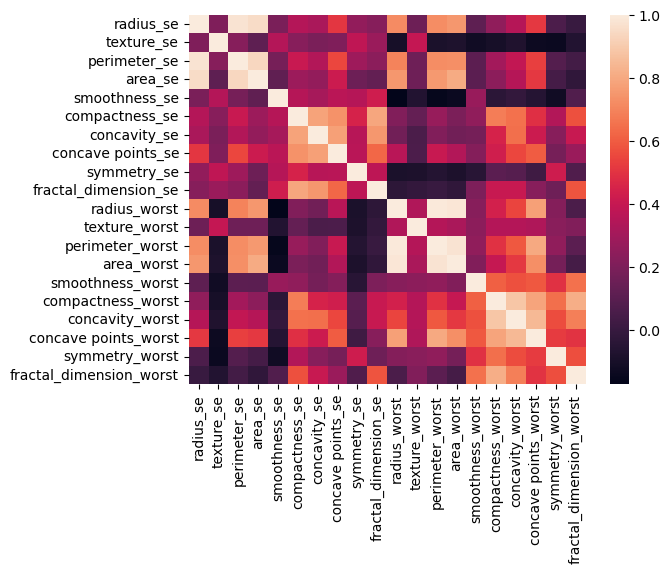

In [108]:
sns.heatmap(data=x_wse.corr())

In [109]:
x_wse.drop(columns=["perimeter_worst","area_worst","concave points_worst","perimeter_se","area_se","concave points_se"],inplace = True)

C:\Users\sebastian\AppData\Local\Temp\ipykernel_7456\995100552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_wse.drop(columns=["perimeter_worst","area_worst","concave points_worst","perimeter_se","area_se","concave points_se"],inplace = True)


In [110]:
X_trainwserl, X_testwserl, y_trainwserl, y_testwserl = train_test_split(
    x_wse, y, test_size=0.3, random_state=42,stratify = y)

In [111]:
y_trainwserl.value_counts()

diagnosis
B    148
M    148
Name: count, dtype: int64

In [112]:
clfwserl = LogisticRegression()

In [113]:
clfwserl.fit(X_trainwserl,y_trainwserl)

LogisticRegression()

In [114]:
clfwserl.coef_

array([[ 1.46133151, -0.41856837,  0.01622575,  0.07374103,  0.14252207,
         0.05110043,  0.00984178,  0.92373698,  0.23559153,  0.33414838,
         1.73765531,  2.29506157,  0.74492541,  0.26137158]])

In [115]:
clfwserl.intercept_

array([-22.78093438])

In [116]:
y_predwserl = clfwserl.predict(X_testwserl)

In [117]:
y_predwserl

array(['M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M'],
      dtype=object)

In [118]:
matrizwserl = confusion_matrix(y_testwserl, y_predwserl)

<Axes: >

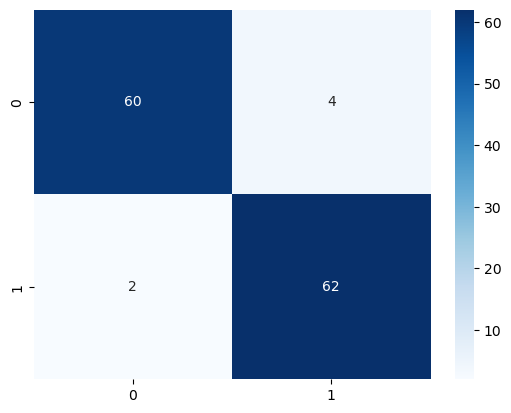

In [119]:
sns.heatmap(data = matrizwserl, annot = True, cmap = 'Blues')

In [120]:
accuracywserl = accuracy_score(y_testwserl, y_predwserl) 

In [121]:
accuracywserl

0.953125

In [122]:
recallwserl = recall_score(y_testwserl, y_predwserl, average='weighted')

In [123]:
recallwserl

0.953125

In [124]:
precisionwserl = precision_score(y_testwserl, y_predwserl, average='weighted')

In [125]:
precisionwserl

0.9535679374389052

In [126]:
clfwsedt = DecisionTreeClassifier()

In [127]:
param_gridwse = {
    'criterion': ['gini', 'entropy']
}

In [128]:
grid_searchwsedt = GridSearchCV(estimator=clfwsedt, param_grid=param_gridwse, cv=5, scoring='accuracy')
grid_searchwsedt.fit(X_trainwserl, y_trainwserl)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [129]:
grid_searchwsedt.best_params_

{'criterion': 'entropy'}

In [130]:
y_predwsedt = grid_searchwsedt.best_estimator_.predict(X_testwserl)

In [131]:
accuracywsedt = accuracy_score(y_testwserl, y_predwsedt)

In [132]:
accuracywsedt

0.921875

In [133]:
recallwsedt = recall_score(y_testwserl, y_predwsedt, average='weighted')

In [134]:
recallwsedt

0.921875

In [135]:
precisionwsedt = precision_score(y_testwserl, y_predwsedt, average='weighted')

In [136]:
precisionwsedt

0.9222873900293255

In [137]:
# Tanto el modelo generado con worst como worst con se en los dataframes "x_w" y "x_wse" son los que muestran los mejores valores tanto 
# en accuracy, recall y precision(teniando ambos modelos exactamente el mismo valor en cada una de estas), 
# lo que nos lleva a concluir que estos 2 son los mejores modelos de los 12